In [1]:
#%matplotlib inline
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd

ndf=pd.read_csv('vocab-filtered', delimiter=' ', header=None)

FileNotFoundError: ignored

In [ ]:
words=ndf[0].to_numpy()
counts = ndf.to_dict('split')
mapping = {}
for k,v in counts['data']:
  mapping[v] = k

In [ ]:
import nltk
nltk.edit_distance("humpty", "dumpty")

def strip_vowels(tstr):
  res = set([])
  for chr in tstr: 
    if chr not in "aeiouAEIOU": 
        res.add(chr) 
  res = "".join(res) 
  return res

count = 0
replace_map = {}

for word1 in words:
  for word2 in words:
    if(abs(len(word1) - len(word2)) < 3 and word1 != word2 and word1[:1] == word2[:1] and word1[-1] == word2[-1]):
      ed =  nltk.edit_distance(word1, word2)
      ratio =  ed / max(len(word1), len(word2))
      con1 = strip_vowels(word1)
      con2 = strip_vowels(word2)
      if ratio < 0.3 and con1 == con2 and  word1 not in replace_map.values():
        # print(word1, '[', mapping[word1], ']', word2, '[', mapping[word2], ']', ed, ratio)
        replace_map[word1] = word2
        count += 1
        break

print('-'*80, '\n', 'Total Matches',replace_map)

-------------------------------------------------------------------------------- 
 Total Matches {'nee': 'nene', 'ani': 'anni', 'kaadhu': 'kadhu', 'okka': 'oka', 'naa': 'nana', 'tho': 'thoo', 'maa': 'mama', 'vaadu': 'vaddu', 'nannu': 'ninnu', 'laaga': 'laga', 'gaaru': 'garu', 'chaala': 'chala', 'pani': 'poni', 'assalu': 'asalu', 'aina': 'anna', 'mundhu': 'mandhu', 'bava': 'baava', 'reddy': 'ready', 'evvaru': 'evaru', 'vaalu': 'vaallu', 'raju': 'roju', 'vellu': 'veelu', 'ayina': 'ayyina', 'ammayyi': 'ammayi', 'saari': 'sari', 'dhaani': 'dhani', 'valla': 'vaala', 'entra': 'entira', 'okkati': 'okati', 'cheppandi': 'cheppindhi', 'dheggira': 'dhaggara', 'pichi': 'picchi', 'emaina': 'emanna', 'baamma': 'bamma', 'kabbadi': 'kabaddi', 'tharvatha': 'tharuvaatha', 'vaalla': 'valla', 'vachindhi': 'vacchindhi', 'evvadu': 'evadu', 'cheyyali': 'cheyali', 'chesthe': 'choosthe', 'vachi': 'vacchi', 'good': 'god', 'mottham': 'motham', 'sasmitha': 'sashmitha', 'cheppina': 'cheppana', 'vaadiki': 'veediki'

In [8]:
import numpy as np
import pandas as pd
import os
import re
import time
from gensim.models import Word2Vec
from gensim.models import FastText
#from gensim.models.wrappers import FastText
from tqdm import tqdm
from pprint import pprint
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
from google.colab import files
import io
from sklearn.metrics import classification_report

#uploaded = files.upload()
data_path = '/content/drive/My Drive/DataScience/data.txt'
f = open(data_path, "r")

#print(Sentences[2][1])
df = pd.DataFrame()
Sentences=[]
count=0
for s in f:
    a=0
    d=[]
    count+=1
    if ";" in s:
        '''if s.count(';') != 2:   Finding number of wrongly formatted lines
            print(count)'''
        b = s.split(";")
        b[2] = b[2].lower()
    #print(len(b[2]))
        for x in range(len(b[2])):
            if (b[2][x] == '.' or b[2][x] == '?' or b[2][x] == '!' or b[2][x] == '…'):
                d.append(b[2][a:x])
                a=x+1
        df.loc[count, "Name"] = b[1]
        df.loc[count, "Utterance"] = b[2]


        for x in range(len(d)):
            sent = d[x].translate({ord(i): None for i in ',-.'})
            Sentences.append(sent.split()) # Need to remove non-alphabetical characters from the lists

#df.to_csv('DataTable.csv')
print(Sentences[:3])

df['Name'] = df['Name'].replace(['Hero', 'Varun', ' Varunu', '06-18:08:Varun', 'varun', ' Varun'], 'Varun')
df['Name'] = df['Name'].replace(['Balraju', 'Bala Raju', 'bala Raju', 'Bala raju', ' Bala Raju'], 'Balraju')
df['Name'] = df['Name'].replace(['Heroine', 'Jagadamba', 'J', 'Jagadhamba', 'Jagdamba', 'Jagadhmba', 'Jagdhamba', ' Jagadhamba', 'Jgadhamba', 'Jagadhama'], 'Jagadamba')
df['Name'] = df['Name'].replace(['krishna', 'Krshna', 'Krishana', 'Kroshna'], 'Krishna')
df['Name'] = df['Name'].replace(['Heroine father', 'Jagadamba father', 'J father', 'Guravayya', 'Guravayy', ' J father', 'Guravyya'], 'Guruvayya') 
df['Name'] = df['Name'].replace(['Heroine grandma', 'Jagadamba grandma', 'J Grand mother', 'Baamma', 'J Grand Mother', 'Grand Mother'], 'J grandma')
df['Name'] = df['Name'].replace(['Boss'], 'Ramesh')
df['Name'] = df['Name'].str.replace('J.s Grand Moyther', 'J grandma', regex=True)
df['Name'] = df['Name'].str.replace('J.s Grand Mother', 'J grandma', regex=True)
df['Name'] = df['Name'].str.replace('Jagadhamba.s Grand Mother', 'J grandma', regex=True)
df['Name'] = df['Name'].str.replace('J.sGrand Mother', 'J grandma', regex=True)
df['Name'] = df['Name'].str.replace('Heroin.s Grand Mother', 'J grandma', regex=True)
df['Name'] = df['Name'].str.replace('Hero-in.s Father', 'Guruvayya', regex=True)
df['Name'] = df['Name'].str.replace('Heroin.s Father', 'Guruvayya', regex=True)
#AllNames = df['Name'].unique().tolist()


print("no of speakers--", len(df.groupby("Name")))
Dialogues_by_Speaker = df.groupby("Name")["Utterance"].count().nlargest(40)
print(Dialogues_by_Speaker.head(40))

df.loc[:, 'Labels'] = "Other"
df.loc[df['Name'] == 'Varun', 'Labels'] = "Varun"
df.loc[df['Name'] == 'Balraju', 'Labels'] = "Balraju"
df.loc[df['Name'] == 'Jagadamba', 'Labels'] = "Jagadamba"
df.loc[df['Name'] == 'Krishna', 'Labels'] = "Krishna"
df.loc[df['Name'] == 'Guruvayya', 'Labels'] = "Guruvayya"
df.loc[df['Name'] == 'Ramesh', 'Labels'] = "Ramesh"

print(df.head(20))
#pprint(AllNames)


''' Gensim Word2Vec code 
start_time = time.time()

model =  Word2Vec(sentences=Sentences, size=100, window=5, min_count=3, workers=4, sg=0)
print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')
'''

for i in range(len(Sentences)):
  dialogue = Sentences[i]
  for j in range(len(dialogue)):
    word = dialogue[j]
    if word in replace_map.keys():
      Sentences[i][j] = replace_map[word]
      
embedding_dim=300

model = FastText(Sentences, size=embedding_dim, window=5, min_count=1, workers=4, sg=0)
#model = FastText.load_fasttext_format(Sentences)
print(len(model.wv.vocab.keys()))
print(model.wv.vector_size)
#print(model.wv.get_vector('assalu'))
print(model.wv.most_similar('assalu'))
model.wv.save_word2vec_format('FastTextVectorsFinal.txt', fvocab = 'Vocab')



[['andhariki', 'annam', 'pettey', 'andhamaina', 'konaseema', 'lo', 'antha', 'kante', 'prasanthamaina', 'palletooru', 'andi'], ['ikkada', 'santhoshale', 'thappa', 'edupulu', 'ayyi', 'peddaga', 'undavu', 'andi'], ['ajja', 'baboi', 'ila', 'okkala', 'meedha', 'okkalu', 'padipoyi', 'ishtam', 'vachesinattu', 'aricheskuntunaru', 'choodandi', 'veelu', 'pellolu', 'andi']]
no of speakers-- 285
Name
Varun            1232
Jagadamba         715
Krishna           660
Balraju           400
Guruvayya         232
Ramesh            197
Mahesh            168
Ranga             162
J grandma         132
Nikhil            124
Madhur            118
SB                100
Shobhan Babu       91
Baali Reddy        86
Sasmitha           73
Puli               72
Apsara             67
SSK                67
KS                 63
Divya              61
Rambabu            54
J mother           51
Simham             49
Rangi              40
Varun grandma      38
Jack               37
Sai Reddy          37
Sash          

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

labels = df['Labels'].values
sentences = df['Utterance'].values

#categorical_labels = to_categorical(labels, num_classes=7)
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, labels, test_size = 0.25, random_state=1000)

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=13000, lower=True)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1

print(sentences_train[2])
print(X_train[2])

 poye mundhu vache dhanne aakhari korika antaru.

[2459, 86, 1026, 2460, 1027, 1792, 389]


In [ ]:
from keras.preprocessing.sequence import pad_sequences

def pad_repeat(A, size=100):
  return np.vstack([np.resize(A[i], size) for i in range(len(A))])

maxlen = 100

X_train=pad_repeat(X_train,maxlen)
X_test=pad_repeat(X_test,maxlen)

X_train = X_train[y_train.argmax(axis=1) != 4]
y_train = y_train[y_train.argmax(axis=1) != 4]
y_train = np.hstack([y_train[:,:4], y_train[:, 5:]])

X_test = X_test[y_test.argmax(axis=1) != 4]
y_test = y_test[y_test.argmax(axis=1) != 4]
y_test = np.hstack([y_test[:,:4], y_test[:, 5:]])


# X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
# X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
    
    return embedding_matrix


#uploaded=files.upload()
embedding_matrix = create_embedding_matrix('FastTextVectorsFinal.txt', tokenizer.word_index, embedding_dim)

# New Section

In [ ]:
import tensorflow.keras as keras
import sys

class LossAndErrorPrintingCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        sys.stdout.write("\rFor batch {}, loss is {:7.2f}.".format(batch, logs["loss"]))

    def on_test_batch_end(self, batch, logs=None):
        sys.stdout.write("\rFor batch {}, loss is {:7.2f}.".format(batch, logs["loss"]))

    def on_epoch_end(self, epoch, logs=None):
        print("Epoch finished {:d}.".format(epoch), logs)


In [ ]:
import numpy as np


class EarlyStoppingAtMinLoss(keras.callbacks.Callback):
    """Stop training when the loss is at its min, i.e. the loss stops decreasing.

  Arguments:
      patience: Number of epochs to wait after min has been hit. After this
      number of no improvement, training stops.
  """

    def __init__(self, patience=0):
        super(EarlyStoppingAtMinLoss, self).__init__()
        self.patience = patience
        # best_weights to store the weights at which the minimum loss occurs.
        self.best_weights = None

    def on_train_begin(self, logs=None):
        # The number of epoch it has waited when loss is no longer minimum.
        self.wait = 0
        # The epoch the training stops at.
        self.stopped_epoch = 0
        # Initialize the best as infinity.
        self.best = np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("loss")
        if np.less(current, self.best):
            self.best = current
            self.wait = 0
            # Record the best weights if current results is better (less).
            self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Restoring model weights from the end of the best epoch.")
                self.model.set_weights(self.best_weights)

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" % (self.stopped_epoch + 1))


In [ ]:
from keras.models import Sequential, Model
from keras import layers
from tensorflow.keras.layers import Dense, LSTM, Embedding,Dropout,SpatialDropout1D,Conv1D,MaxPooling1D,GRU,BatchNormalization
from tensorflow.keras.layers import Input,Bidirectional,GlobalAveragePooling1D,GlobalMaxPooling1D,concatenate,LeakyReLU, Flatten
from tensorflow.keras import regularizers
import sys


model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))

model.add(layers.Conv1D(150, kernel_size=4,kernel_regularizer=regularizers.l2(0.00001), padding='same'))
model.add(layers.LeakyReLU(alpha=0.2))
model.add(layers.MaxPool1D(pool_size=2))
model.add(SpatialDropout1D(0.5))
# model.add(Flatten())
# model.add(layers.Embedding(vocab_size, embedding_dim, 
#                            weights=[embedding_matrix], 
#                            input_length=maxlen, 
#                            trainable=False))
# model.add(layers.Conv1D(10, kernel_size=8,kernel_regularizer=regularizers.l2(0.00001), padding='same'))
# model.add(layers.LeakyReLU(alpha=0.2))
# model.add(layers.MaxPool1D(pool_size=2))
# model.add(SpatialDropout1D(0.5))
# #model.add(Flatten())
model.add(Bidirectional(LSTM(100,dropout=0.5, recurrent_dropout=0.5)))

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(6,activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

print(y_train.shape, y_test.shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 300)          3408000   
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 150)          180150    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100, 150)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 150)           0         
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 150)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               200800    
_________________________________________________________________
dense (Dense)                (None, 10)                2

In [ ]:
import matplotlib.pyplot as plt
import argparse

history = model.fit(X_train, y_train,
                    epochs=150,
                    verbose=False,
                    validation_split=0.1,
                    batch_size=128,
                    callbacks=[LossAndErrorPrintingCallback()])


[INFO] evaluating network...
[2 0 5 0 2 5 5 5 5 2 5 0 5 3 5 5 2 0 2 5 5 5 5 2 3 5 2 2 2 5 2 2 5 5 2 2 2
 5 2 3 5 5 2 0 5 5 0 5 5 5 5 5 2 5 1 2 3 3 2 2 3 3 3 5 5 5 2 2 1 5 5 5 5 2
 5 5 5 1 5 2 5 3 2 1 5 2 5 2 5 2 5 5 0 1 2 5 5 4 2 5 5 5 2 5 2 2 2 0 3 5 0
 5 2 5 2 2 2 3 5 2 5 2 2 5 2 5 5 5 1 5 3 2 0 5 4 3 5 2 5 3 5 5 2 2 2 3 2 2
 3 2 2 5 5 2 3 3 3 3 2 5 5 0 5 3 5 2 3 2 2 2 2 5 2 2 2 3 2 1 2 2 3 2 2 3 0
 5 5 5 5 5 5 5 2 2 5 2 5 5 3 5 5 5 2 2 2 5 5 5 3 2 2 2 3 2 1 2 5 5 5 0 3 2
 5 2 2 4 5 5 2 2 5 0 5 5 3 2 5 2 2 2 5 2 2 5 2 3 2 3 3 2 2 3 5 5 5 3 5 5 2
 5 2 5 2 2 5 2 0 5 2 2 1 5 5 3 2 2 5 3 5 0 3 2 5 0 5 5 3 5 2 5 3 4 5 0 3 5
 5 2 4 5 5 5 5 5 2 2 5 5 3 3 2 2 0 5 0 1 2 2 2 2 2 5 3 2 3 3 5 5 5 4 5 5 5
 3 5 3 2 5 5 3 5 2 3 0 3 5 4 5 5 2 5 0 4 2 5 3 2 5 5 5 2 2 5 2 5 2 5 2 5 5
 5 2 5 5 2 5 5 5 5 2 3 0 2 0 5 5 3 4 5 1 5 5 5 2 2 2 5 5 5 5 3 1 0 3 0 2 5
 4 2 2 5 2 2 5 0 5 5 5 2 2 5 5 3 5 0 2 2 5 5 5 5 5 1 3 5 2 2 2 5 5 2 2 5 5
 2 5 5 0 0 5 2 2 5 5 5 0 4 5 3 2 5 5 5 4 2 5 5 5 5 5 5 2 5 5 5 2 2 0 2 

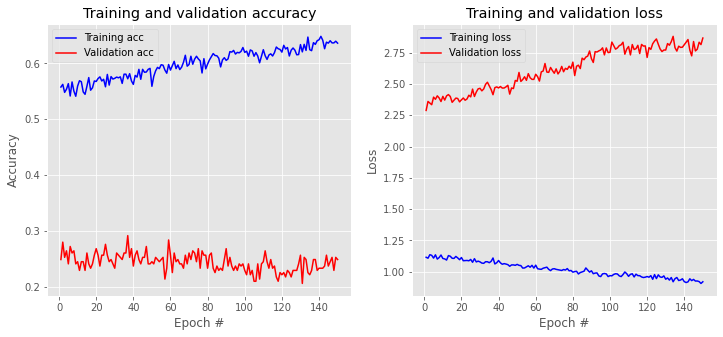

In [ ]:
from scipy import stats
print("[INFO] evaluating network...")
predictions = model.predict(x=X_test, batch_size=16)
print(predictions.argmax(axis=1))
print(stats.describe(predictions.argmax(axis=1)))
print(y_test.argmax(axis=1))
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

plt.style.use('ggplot')

def plot_history(history):
    #N = np.arrange(0, 50) #no of Epochs
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()
    #plt.savefig(args["plot"])

plot_history(history)

print("[INFO] serializing network and label binarizer...")
#model.save(args["model"], save_format="h5")